# Classical Portfolio Optimization

This notebook is used to generate a portfolio of 10 random stocks from the AlphaVantage API and then optimize the portfolio weights using Markowitz theory. The optimization analysis can be performed using 3 years of historical stock data (2014-2017). 

The returns of the portfolio with and without optimization over a 3 year test timeframe can then be calculated (2017-2020). These results will be used as the baseline in which the optimization performed through supervised and unsupervised learning will be compared.

In order to perform the optimization, the stock data must be obtained, the **expected returns** must be calculated, the **variance** of the stock data must be calculated and the **effecient frontier** must be found.


## Obtaining stock data



### Getting stock names
The stock names can be found by obtaining an array of all the stocks in the S&P 500 index, generating 10 random numbers and then using those numbers to choose 10 array items.

In [21]:
#Taken from Automating getting the S&P 500 list - Python Programming for Finance p.5
# https://pythonprogramming.net/sp500-company-list-python-programming-for-finance/

import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.strip("\n"))
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()
    

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'T',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

Next 10 random numbers between 0 and 504 can be generated in order to pick 10 random stock tickers from the list

In [22]:
import random

tickers = save_sp500_tickers()
print(len(tickers)) # there are actually 505 stocks in the S&P 500, who knew!

def getRandomTickers(tickers):
  randIndex = []
  randTickers = []
  for i in range(0,10):
    randIndex.append(random.randint(0,504))
  for index in randIndex:
    randTickers.append(tickers[index])
  return randTickers

print(getRandomTickers(tickers)) 


505
['CSCO', 'TSN', 'CE', 'MRO', 'AIV', 'UDR', 'PNC', 'CPRI', 'COO', 'CVS']


Markowitz Analysis requires a vector of expected returns over the period of analysis for all of the stocks in the portfolio as well as the cauculation of the covariance matrix for the stocks. This can then be used to generate the portfolio weight vector omega.

The ffn library will be used to retrieve data for the random tickers generated from yahoo finance from March 26, 2010 to March 26, 2015.Then the preliminary Markowitz analysis can be conducted


In [23]:
#setup
%matplotlib inline

#need to add these packages to requirements.txt
!pip install empyrical ffn PyPortfolioOpt

#taken from https://github.com/Poseyy/MarketAnalysis/blob/master/portfolios/PortfolioAnalysis.ipynb
import ffn 
from empyrical import alpha_beta
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
import matplotlib as pyplot
import numpy as np
import pandas as pd

In [0]:
#generate random portfolio
randomTickers = getRandomTickers(tickers)

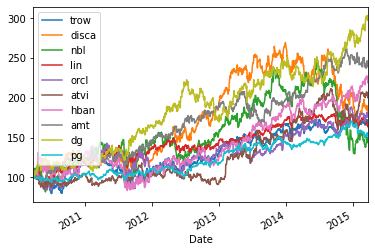

In [25]:
#retrieve price data for training period, plot data

prices = ffn.get(randomTickers,start='2010-03-26', end='2015-03-26')
ax = prices.rebase().plot()

Now we can plot the returns for this portfolio

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

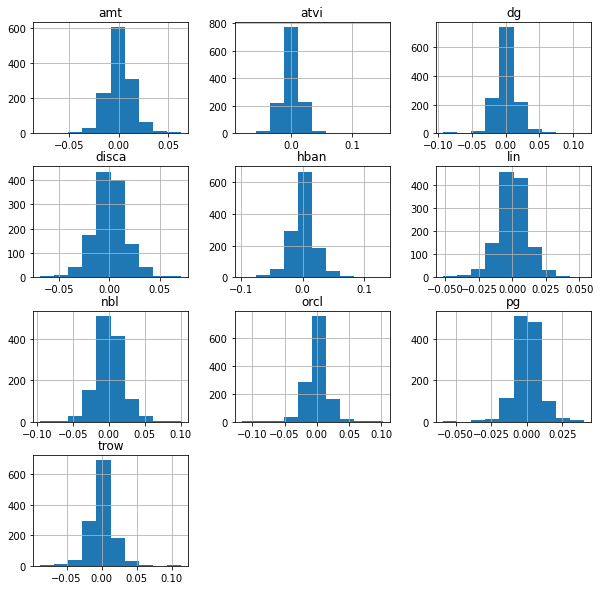

In [26]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10,10))

In [27]:
#display stats for the portfolio
stats = prices.calc_stats()
stats.display()

Stat                 trow        disca       nbl         lin         orcl        atvi        hban        amt         dg          pg
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26  2010-03-26
End                  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26  2015-03-26
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         66.62%      80.20%      49.98%      63.66%      75.78%      99.85%      119.62%     139.96%     199.24%     50.91%
Daily Sharpe         0.51        0.59        0.42        0.64        0.57        0.65        0.65        0.93        0.99        0.65
Daily Sortino        0.84        0.99     

/usr/local/lib/python3.6/dist-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Calculate mean expected returns and covariance matrix for the price data (as per defaults specified in the PyPortfolioOpt docs https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html )

In [28]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()
print("Mean expected returns: \n")
print(mu, "\n")
print("Covariance matrix: \n")
print(S, "\n")

Mean expected returns: 

trow     0.139572
disca    0.151394
nbl      0.127322
lin      0.115036
orcl     0.145538
atvi     0.174869
hban     0.210220
amt      0.198284
dg       0.252113
pg       0.092433
dtype: float64 

Covariance matrix: 

           trow     disca       nbl  ...       amt        dg        pg
trow   0.074471  0.039517  0.049366  ...  0.028448  0.018867  0.018730
disca  0.039517  0.066730  0.036509  ...  0.023218  0.016818  0.012646
nbl    0.049366  0.036509  0.091821  ...  0.025923  0.012463  0.014652
lin    0.033210  0.024569  0.032863  ...  0.017751  0.012873  0.010107
orcl   0.041698  0.031559  0.033728  ...  0.021170  0.014506  0.012640
atvi   0.027869  0.022857  0.030279  ...  0.017551  0.010909  0.009116
hban   0.059192  0.039627  0.048159  ...  0.028012  0.020573  0.016371
amt    0.028448  0.023218  0.025923  ...  0.045955  0.013786  0.010740
dg     0.018867  0.016818  0.012463  ...  0.013786  0.065092  0.006784
pg     0.018730  0.012646  0.014652  ...  0.010

Perform efficient frontier optimization using the max-sharpe ratio as the optimization parameter

In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions

#calculate efficient frontier
ef = EfficientFrontier(mu, S)

"""
use gamma parameter to reduce tendency of optimization to result in 0 asset weights, 
as this is detrimental to portfolio diversication

https://pyportfolioopt.readthedocs.io/en/latest/EfficientFrontier.html#l2-regularisation

"""
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
weights = ef.max_sharpe()

#use cleaned weights function to round data
cleaned_weights = ef.clean_weights()

#ef.save_weights_to_file("weights.txt")  # saves to file
print(cleaned_weights)

#print expected performance
ef.portfolio_performance(verbose=True)

{'trow': 0.0, 'disca': 0.06697, 'nbl': 0.00506, 'lin': 0.04299, 'orcl': 0.06386, 'atvi': 0.13707, 'hban': 0.11589, 'amt': 0.20687, 'dg': 0.29038, 'pg': 0.07091}
Expected annual return: 19.4%
Annual volatility: 16.1%
Sharpe Ratio: 1.08


/usr/local/lib/python3.6/dist-packages/pypfopt/efficient_frontier.py:178: UserWarning: max_sharpe transforms the optimisation problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimisation problem so additional objectives may not work as expected."


(0.19413604208509386, 0.16092982177109322, 1.0820619830971117)

Now that the weights have been generated for the portfolio, 
the weighted and unweighted portfolio performance can be tested over the period of 2015-2020. The performance of the two portfolios can be compared to determine if the optimization indeed will improve returns.

The annualized returns of the weighted portfolio can also be compared to the estimation provided by the PyPortfolioOpt library.

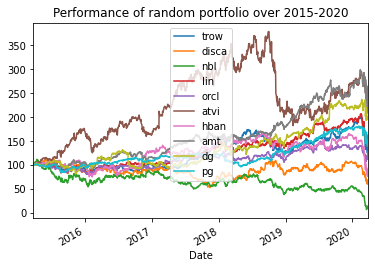

In [30]:
#obtain price data for test period
testPrices = pd.DataFrame()
testPrices = ffn.get(randomTickers,start='2015-03-26', end='2020-03-26')
ax = testPrices.rebase().plot(title="Performance of random portfolio over 2015-2020")

Now we can calulate annualized return, volatility and sharpe ratio for the unweighted and weighted portfolios

In [31]:
#https://towardsdatascience.com/optimizing-portfolios-with-modern-portfolio-theory-using-python-60ce9a597808 
print("Ticker Labels:")
print(randomTickers)
print("Equi-weighted portfolio weights:")
print(np.full(10,.1), "\n")
print("Optimized portfolio weights:")
print(list(cleaned_weights.values()), "\n")

opt_weights = list(cleaned_weights.values())
weights_arr = [np.full(10,.1), opt_weights]
returns_arr = []
volatility_arr = []

print(" --- Results --- ")
for weights in weights_arr:
  returns = prices.pct_change()
  
  # mean daily return and covariance of daily returns
  mean_daily_returns = returns.mean()
  cov_matrix = returns.cov()

  # portfolio weights
  weights = np.asarray(weights)
  
  portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
  portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

  returns_arr.append(portfolio_return)
  volatility_arr.append(portfolio_std_dev)

  if(weights[0] == .1):
    print("Equal weighted portfolio stats:")
  else:
    print("Optimized portfolio stats:")
  print("Annualised return: " + str(portfolio_return))
  print("Volatility: " + str(portfolio_std_dev) + "\n")

print("Percent change in return after optimization: " + str(((returns_arr[1] - returns_arr[0])/returns_arr[0])))
print("Percent change in volatility after optimization: " + str(((volatility_arr[1] - volatility_arr[0])/volatility_arr[0])))

Ticker Labels:
['TROW', 'DISCA', 'NBL', 'LIN', 'ORCL', 'ATVI', 'HBAN', 'AMT', 'DG', 'PG']
Equi-weighted portfolio weights:
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1] 

Optimized portfolio weights:
[0.0, 0.06697, 0.00506, 0.04299, 0.06386, 0.13707, 0.11589, 0.20687, 0.29038, 0.07091] 

 --- Results --- 
Equal weighted portfolio stats:
Annualised return: 0.16
Volatility: 0.17

Optimized portfolio stats:
Annualised return: 0.19
Volatility: 0.16

Percent change in return after optimization: 0.1875
Percent change in volatility after optimization: -0.058823529411764754


# **--- Optimization Results ---**

**Percent change in returns:** 58.8%

**Percent change in risk:** -5%

As expected, the portfolio optimization not only increased annualized returns, but also slightly decreased volitility.

Now we can graph the performance of the two portfolios with respect to the individual securities to visualize their performance.

0    0.00000
1    0.06697
2    0.00506
3    0.04299
4    0.06386
5    0.13707
6    0.11589
7    0.20687
8    0.29038
9    0.07091
dtype: float64
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
dtype: float64


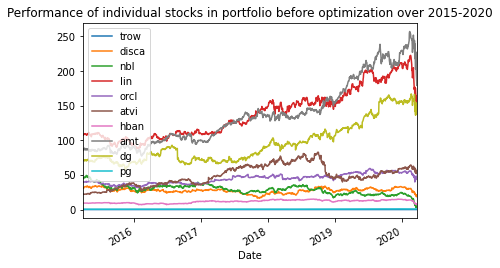

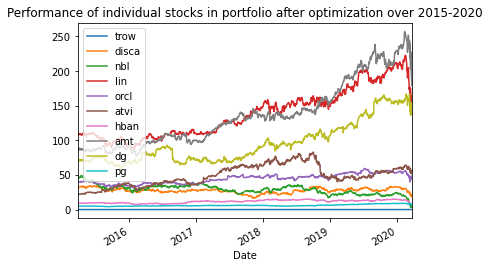

In [32]:

def multiplyWithPrice(row, weights):
  #print(row)
  #print(row.name)
  #print(row.values)
  #print(weights)
  #print(weights[row.name])
  modifiedRow = []
  for i in (0, len(row.values)-1):
    row.values[i] = row.values[i]*weights[i]
    #modifiedRow.append(row[i]*weights[row.name])
  #return modifiedRow
  return row

#print(cleaned_weights)
opt_weights_ser = pd.Series(opt_weights)
equal_weights_ser = pd.Series(np.full(10,.1))
print(opt_weights_ser)
print(equal_weights_ser)

#calculate weighted portfolio
temp = testPrices
w_portfolio = temp.apply(lambda row: multiplyWithPrice(row, opt_weights_ser), axis=1)

#calculate unweighted portfolio (still need to multiply everything by .1)
temp = testPrices
uw_portfolio = temp.apply(lambda row: multiplyWithPrice(row, equal_weights_ser), axis=1)

#plot all stocks in portfolios
ax = uw_portfolio.plot(title="Performance of individual stocks in portfolio before optimization over 2015-2020")
ax1 = w_portfolio.plot(title="Performance of individual stocks in portfolio after optimization over 2015-2020")










unweighted portfolio before finding sum:
            trow      disca        nbl  ...         amt          dg        pg
Date                                    ...                                  
2015-03-26   0.0  30.930000  44.213196  ...   86.046387   70.548950  0.498133
2015-03-27   0.0  31.270000  44.268524  ...   86.805649   70.747063  0.499103
2015-03-30   0.0  31.090000  45.236904  ...   86.914108   70.681038  0.501589
2015-03-31   0.0  30.760000  45.098564  ...   85.097366   71.114998  0.496859
2015-04-01   0.0  30.910000  45.070892  ...   87.185272   70.945190  0.499164
...          ...        ...        ...  ...         ...         ...       ...
2020-03-20   0.0  18.760000   4.030000  ...  195.389999  140.130005  0.726331
2020-03-23   0.0  18.490000   4.470000  ...  179.089996  139.869995  0.692791
2020-03-24   0.0  20.030001   5.830000  ...  190.270004  141.820007  0.732288
2020-03-25   0.0  21.059999   6.120000  ...  199.259995  137.229996  0.715624
2020-03-26   0.0  20.93

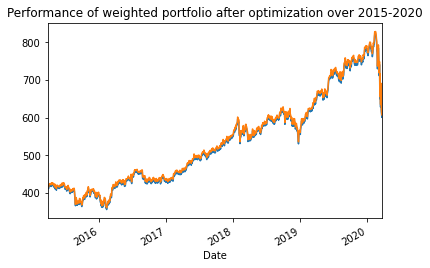

In [33]:
print("unweighted portfolio before finding sum:")
print(uw_portfolio)
uw_portfolio = uw_portfolio.sum(axis=1)

print("unweighted portfolio")
print(uw_portfolio)
ax3 = uw_portfolio.plot(title="Performance of unweighted portfolio over 2015-2020")


print("weighted portfolio before finding sum:")
print(w_portfolio)
w_portfolio = w_portfolio.sum(axis=1)

print("weighted portfolio")
print(w_portfolio)
ax1 = w_portfolio.plot(title="Performance of weighted portfolio after optimization over 2015-2020")

            unweighted   optimized
Date                              
2015-03-26  410.518369  415.001565
2015-03-27  411.466845  415.958772
2015-03-30  414.657174  419.171476
2015-03-31  411.589004  416.060739
2015-04-01  413.344751  417.837224
...                ...         ...
2020-03-20  615.656340  622.193320
2020-03-23  600.272782  606.507898
2020-03-24  633.192298  639.782886
2020-03-25  636.135614  642.576227
2020-03-26  681.511436  688.364320

[1260 rows x 2 columns]


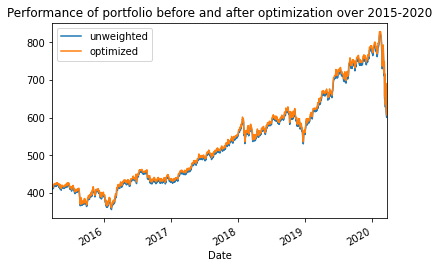

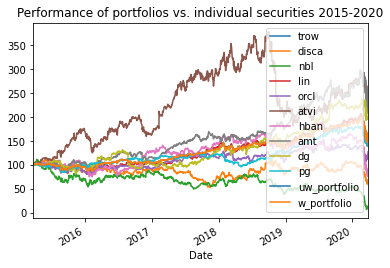

In [34]:
#plot performance of the two portfolios
portfolios = pd.concat([uw_portfolio, w_portfolio], axis=1, keys=['unweighted', 'optimized'])
print(portfolios)
ax = portfolios.plot(title="Performance of portfolio before and after optimization over 2015-2020")

#add portfolio data to price data
fullPrices = testPrices
fullPrices['uw_portfolio'] = uw_portfolio
fullPrices['w_portfolio'] = w_portfolio

#plot new data
ax1 = fullPrices.rebase().plot(title="Performance of portfolios vs. individual securities 2015-2020")
